# Validation of the Abe model

This document contains the validation of the Abe model as presented by [Abe et al. (1994](https://www.sciencedirect.com/science/article/pii/0017931094901686)

In [135]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.style
import matplotlib as mpl
%matplotlib inline

In [169]:
Re = 395
df_field = pd.read_fwf('../laminarbl.csv',widths=30*[20]) #the complete fi?eld
df_field['uplus_']    =df_field['uplus'].apply(lambda x: float(x))
df_field['y_']    =df_field['y'].apply(lambda x: 1-float(x))
df_field['mut_scaled']=df_field['mut'].apply(lambda x: x*Re)
df_num = df_field[df_field['x']==df_field['x'].unique()[25]]
df_num = df_num.iloc[1:]
#read the validation data
df_val_uplus = pd.read_csv("validation_data/Abe(1994)_uplus.csv", sep='\t', header=None, names=['yplus', 'uplus'])
df_val_mut = pd.read_csv("validation_data/Abe(1994)_mut.csv", sep='\t', header=None, names=['yplus', 'mut'])

In [170]:
df = pd.read_csv('validation_data/matlab_code/AbeValidation_Matlab.txt',sep=',')
df['mut_scaled']=df['mut']*Re

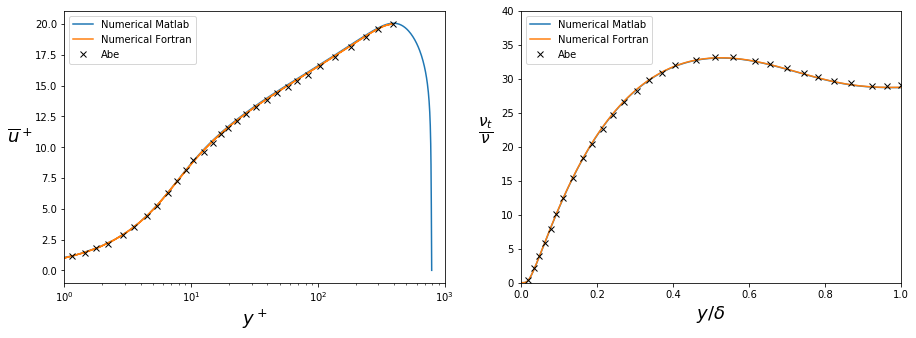

In [171]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
df.plot('yplus', 'uplus',ax=ax1, label='Numerical Matlab')
df_num.plot('yp', 'uplus_',ax=ax1, label='Numerical Fortran')

df_val_uplus.plot('yplus','uplus',ax=ax1, marker='x', linestyle="None",color='k', label='Abe' )
ax1.set_xscale('log')
ax1.set_xlabel(r"$y^+$", fontsize=18)
ax1.set_ylabel(r"$\overline{u}^+$", rotation=0, fontsize=18, labelpad=15)
ax1.set_xbound(1,1000)
# ax1.set_ybound(0,25)

df.plot('y', 'mut_scaled',ax=ax2, label='Numerical Matlab')
df_num.plot('y', 'mut_scaled',ax=ax2, label='Numerical Fortran')

df_val_mut.plot('yplus','mut',ax=ax2, marker='x', linestyle="None",color='k', label='Abe' )
ax2.set_xlabel(r"$y/\delta$", fontsize=18)
ax2.set_ylabel(r"$\frac{\nu_t}{\nu}$", rotation=0, fontsize=22, labelpad=15)
ax2.set_xbound(0,1)
ax2.set_ybound(0,40)

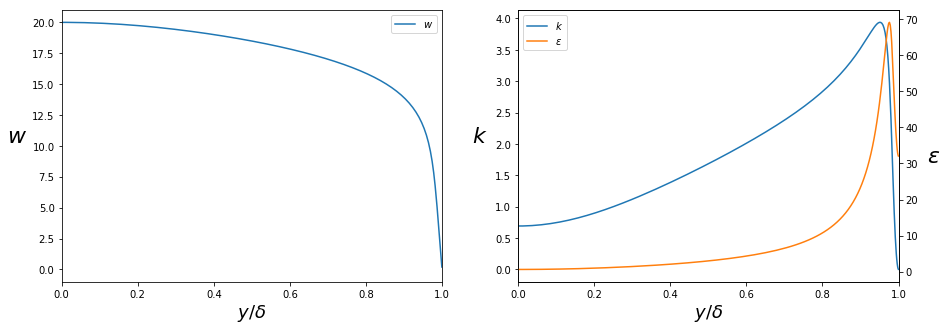

In [172]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax3 = ax2.twinx()
df_num.plot('y_','w',ax=ax1, label=r'$w$')
df_num.plot('y_','k',ax=ax2, label=r'$k$',color=colors[0])
df_num.plot('y_','eps',ax=ax3, label=r'$\epsilon$', color=colors[1])
ax1.set_xlabel(r"$y/\delta$", fontsize=18)
ax1.set_ylabel(r"$w$", rotation=0, fontsize=22, labelpad=15)
ax1.set_xbound(0,1)
ax1.set_xlabel(r"$y/\delta$", fontsize=18)
ax2.set_xlabel(r"$y/\delta$", fontsize=18)
ax2.set_ylabel(r"$k$", rotation=0, fontsize=22, labelpad=15)
ax3.set_ylabel(r"$\epsilon$", rotation=0, fontsize=22, labelpad=15)
ax2.set_xbound(0,1)

lines, labels = ax2.get_legend_handles_labels()
lines2, labels2 = ax3.get_legend_handles_labels()
ax3.get_legend().remove()
ax2.legend(lines + lines2, labels + labels2, loc=0)
# ax2.legend(lines2, labels2, loc=0)

